In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [2]:
#importing packages

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [3]:
testData = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv", index_col = 0)
trainData = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv", index_col = 0)
moddedData =  trainData.copy()

<h1>Data exploration and engineering</h1>

In [4]:
print(f"Train data columns: {trainData.columns}")

Train data columns: Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')


In [5]:
#Categorical columns
catCols = ['person_home_ownership', "loan_intent", 'loan_grade', 'cb_person_default_on_file']

#numerical columns
numCols = ["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length"]

target ="loan_status"

In [6]:
for i in catCols:
    print(f"Unique values in : {trainData[i].value_counts()} \n\n")

Unique values in : person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64 


Unique values in : loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64 


Unique values in : loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64 


Unique values in : cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64 




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


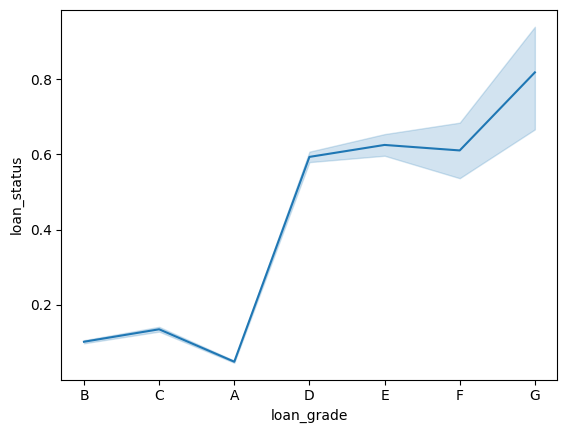

In [7]:
sns.lineplot(trainData, x=trainData.loan_grade, y = trainData.loan_status)
#We can see that that there is a correlation betweek loan_grade and loan status. So we encode loan_grade using Ordinal Encoding.
ordEncoder = OrdinalEncoder(categories=[['A','B','C','D','E','F','G']])

moddedData["loan_grade_encoded"] = ordEncoder.fit_transform(pd.DataFrame(trainData.loan_grade))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loan_intent', ylabel='loan_status'>

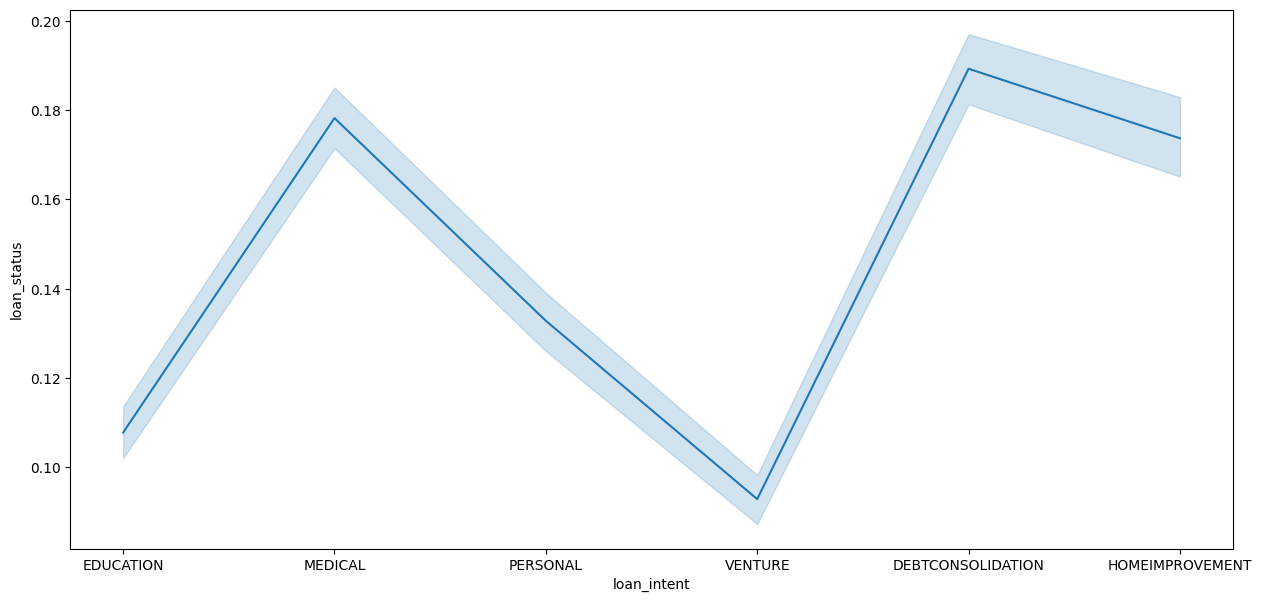

In [8]:
plt.figure(figsize=(15,7))
sns.lineplot(trainData, x=trainData.loan_intent, y = trainData.loan_status)
